In [1]:
from fomos.io import FormindData
from fomos.data import MLData
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import PrecisionRecallDisplay
from sklearn.metrics import f1_score
import copy
import numpy as np
import h5py

In [2]:
pft = "beech"
agg = "monthly"
n_years = 3
directory = "/data/compoundx/anand/benchmark-dataset/"
filename = directory + f"train_MBR_{pft}_{agg}_{n_years}_years_10000ha.h5"


In [3]:
ALL = FormindData(agg=agg, pft=pft, y="ALL").get_train()[-1]

In [4]:
ALL.shape

(127983, 4)

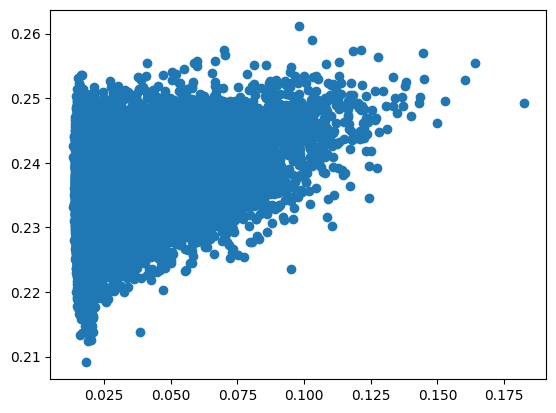

In [13]:
plt.scatter(ALL[:,0], ALL[:,3] )

In [4]:
GPP = FormindData(agg=agg, pft=pft, y="GPP").get_train()[-1]


In [5]:
NEE = FormindData(agg=agg, pft=pft, y="NEE").get_train()[-1]


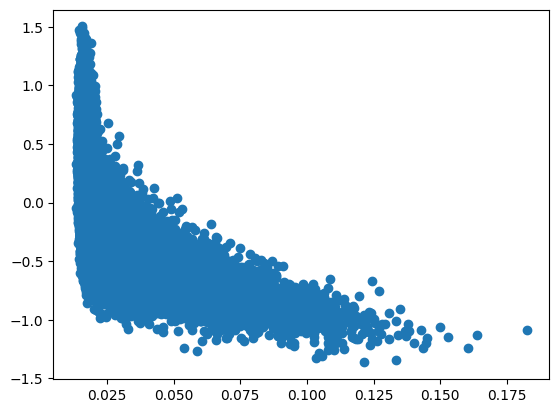

In [9]:
plt.scatter(MBR, NEE)

ValueError: x and y must be the same size

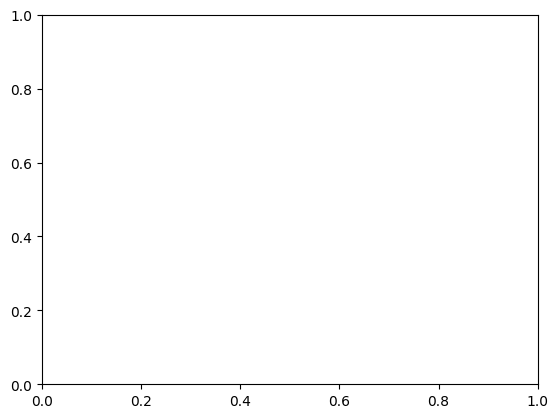

In [11]:
plt.scatter(MBR,NEE)

In [2]:
def plot_pr(X, Y):
    X = np.squeeze(X)
    Y = np.squeeze(Y)

    clf = LogisticRegression(max_iter=50000).fit(X, Y)
    PrecisionRecallDisplay.from_estimator(clf, X, Y)

In [3]:
def write_benchmark_data(filename, var_list, arr_list):
    with h5py.File(filename, "w") as f:
        for i, each in enumerate(var_list):
            if each == "bin":
                for key, val in arr_list[i].items():
                    f[key] = val
            else:    
                f[each] = arr_list[i]


# data = MLData(Xd ,Xs, Y)
# Xd, Xs, Y = data.get_XY(classify=False)
# write_benchmark_data(filename, ["Xd", "Xs", "bin", "Y"], [Xd, Xs, bin, Y])

In [9]:
directory = "/data/compoundx/anand/benchmark-dataset/" 
filename = directory + "test_MBR_beech_monthly_10000ha.h5"
train_data = FormindData().get_train()
Xd, Xs, bin, Y = train_data
print(Xd.shape)
print(Y.shape)

# Y = np.where(Y>np.percentile(Y, 90), 1, 0)
# Xd = Xd.reshape(Xd.shape[0], -1)
# Xs = Xs.reshape(Xs.shape[0], -1)

# Xd = (Xd - Xd.mean(0))/Xd.std(0)

# plot_pr(Xd, Y)

(25595, 12, 3)
(25595,)


In [7]:
index = Y>np.percentile(Y, 90)

In [ ]:
plt.subplots(Xd)